Time Series Analysis throughout the proper visualization. In this project I will analyze unemployment rate in USA across industries for 10 years starting from 2000.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
jobs = pd.read_csv("/content/drive/MyDrive/Dataset/ch5_employment.csv")

In [ ]:
jobs.loc[34]

datestamp                         2002-11-01
Agriculture                             11.1
Business services                        8.2
Construction                             8.5
Durable goods manufacturing              6.7
Education and Health                     2.8
Finance                                  3.7
Government                               2.3
Information                              6.5
Leisure and hospitality                  8.9
Manufacturing                            6.3
Mining and Extraction                    5.4
Nondurable goods manufacturing           5.6
Other                                    4.9
Self-employed                            2.8
Transportation and Utilities             4.2
Wholesale and Retail Trade               6.2
Name: 34, dtype: object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The dataset jobs contains time series for 16 industries and across 122 timepoints, one per month for 10 years. 

In [ ]:
# check the type of each column in DF
print(jobs.dtypes)

datestamp                          object
Agriculture                       float64
Business services                 float64
Construction                      float64
Durable goods manufacturing       float64
Education and Health              float64
Finance                           float64
Government                        float64
Information                       float64
Leisure and hospitality           float64
Manufacturing                     float64
Mining and Extraction             float64
Nondurable goods manufacturing    float64
Other                             float64
Self-employed                     float64
Transportation and Utilities      float64
Wholesale and Retail Trade        float64
dtype: object


In [ ]:
# convert 'datestamp' column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'], 
                                   format="%Y-%m-%d", 
                                   errors = 'coerce')
# set 'datestamp' column as index
jobs.set_index("datestamp", inplace=True)

In [ ]:
# check the number of missing values
jobs.isna().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

# Explore the distribution of the variables.

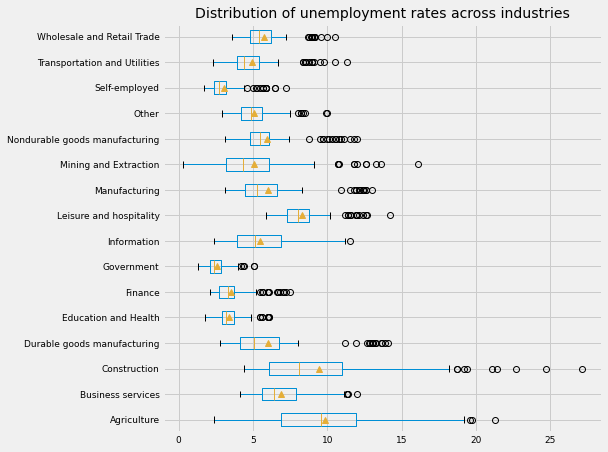

In [ ]:
plt.style.use("fivethirtyeight")
# generate a boxplot of all time series in jobs
ax = jobs.boxplot(figsize=(7,7), 
                  fontsize=9, 
                  vert=False, 
                  showmeans=True)
ax.set_title("Distribution of unemployment rates across industries", 
             fontsize=14)
plt.show()

In [ ]:
# generate the maximum mean
jobs.mean()\
.sort_values(ascending=False)\
.head(1)

Agriculture    9.840984
dtype: float64

In [ ]:
# generate the maximum std
jobs.std()\
.sort_values(ascending=False)\
.head(1)

Construction    4.587619
dtype: float64

Both the box plot diagram and summary statistics shows that Agriculture has the highest mean and Construction has the most variability e.g. the highest standard deviation.

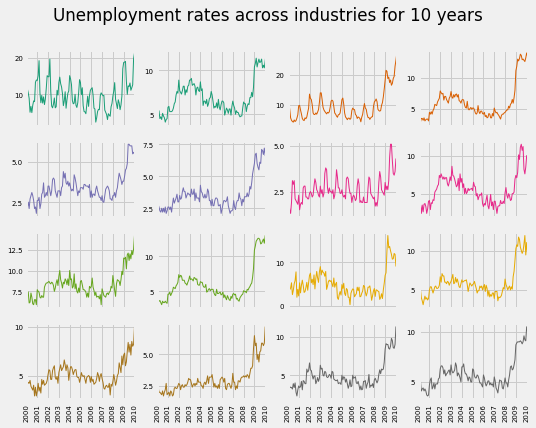

In [ ]:
# visualize all time serises 
ax = jobs.plot(subplots=True, 
               layout = (4, 4), 
               sharex = True, 
               sharey = False, 
               linewidth = 1,
               legend=False, 
               fontsize = 7,  
               figsize = (8, 6), 
               title="Unemployment rates across industries for 10 years", 
               xlabel="",
               colormap='Dark2',
               rot=90)
plt.show()

The plot shows that there was a drastic increase in unemployment rate in 2001 and 2008 across all industries.

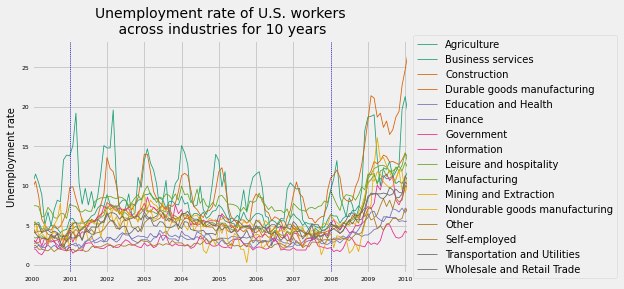

In [ ]:
ax = jobs.plot(colormap='Dark2', 
               fontsize=6, 
               linewidth = .8)
ax.set_xlabel("")
ax.set_ylabel("Unemployment rate", fontsize=10)
ax.set_title("Unemployment rate of U.S. workers\n across industries for 10 years", fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)
# annotate plot with vertical lines indicating increase in unemployment rates
ax.axvline('2001-01-01', color='blue', linestyle='dotted', linewidth=.8)
ax.axvline('2008-01-01', color='blue', linestyle='dotted', linewidth=.8)
plt.show()

# Compute and plot avearge unemployment rate across months

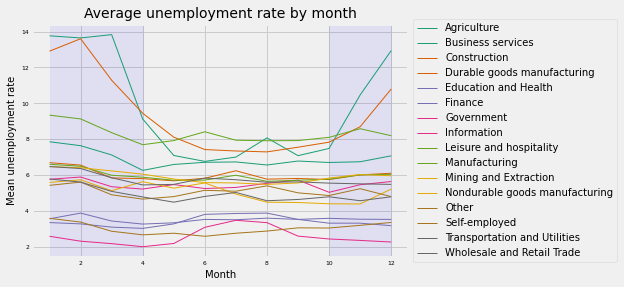

In [ ]:
# Extract the month from the index of jobs
index_month = jobs.index.month
# compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()
# plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, 
                        linewidth=1, 
                        colormap='Dark2')
ax.set_xlabel("Month", fontsize=10)
ax.set_ylabel("Mean unemployment rate", fontsize=10)
ax.set_title("Average unemployment rate by month", fontsize=14)
ax.legend(bbox_to_anchor=(1.0, 0.5), fontsize=10, loc='center left')
ax.axvspan(1, 4, color='blue', alpha=0.07)
ax.axvspan(12, 10, color='blue', alpha=0.07)
plt.show()

# Compute and plot avearge unemployment rate across years

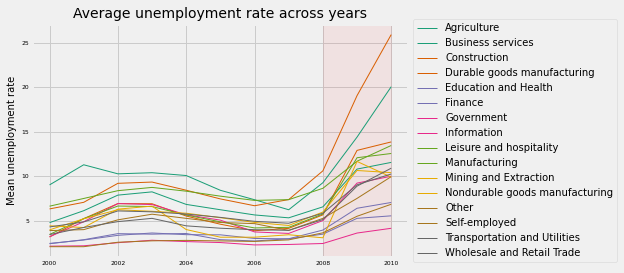

In [ ]:
# Extract the year of the date 
index_year = jobs.index.year
# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()
# plot the average unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, 
                       linewidth=1, 
                       colormap='Dark2')
ax.set_xlabel("")
ax.set_ylabel("Mean unemployment rate", fontsize=10)
ax.set_title("Average unemployment rate across years", 
             fontsize=14)
ax.legend(bbox_to_anchor=(1.0, .5), loc='center left', fontsize=10)
ax.axvspan(2010, 2008, color='red', alpha=.06)
plt.show()

Averaging time series values by month shows that unemployment rate tend to be a lot higher during the winter months for Agriculture and Construction industries. The increase in unemployment rate after 2008 is very clear when averaging time series by year.

# Time series decomposition: trends, seasonal patterns, noise.

In [ ]:
# initialize dictionary
jobs_decomp = {}
# Get the names of each time series
jobs_names = jobs.columns
# Run time series decomposition on each time series of the DF
for ts in jobs_names:
  ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
  jobs_decomp[ts] = ts_decomposition

# Extract and visualize seasonality

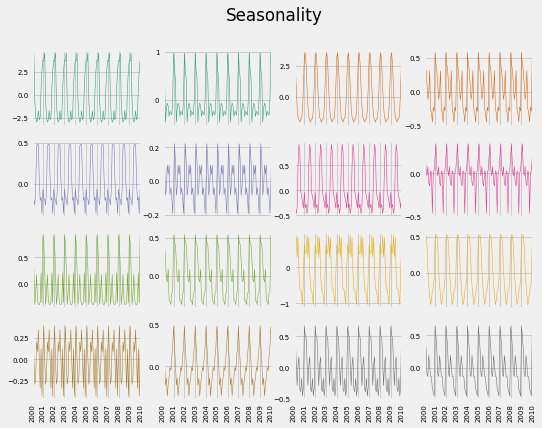

In [ ]:
# Extract the seasonal values for each time series
jobs_seasonal = {}
for ts in jobs.columns:
  jobs_seasonal[ts] = jobs_decomp[ts].seasonal
# convert data into DF
seasonality_df = pd.DataFrame(jobs_seasonal)
# Plot seasonality
ax = seasonality_df.plot(subplots=True, 
                    layout=(4, 4),  
                    sharey=False, 
                    fontsize=7, 
                    linewidth=.5, 
                    legend=False, 
                    title = "Seasonality", 
                    xlabel = "", 
                    figsize=(8, 6), 
                    colormap='Dark2', 
                    rot=90)
plt.show()

# Extract and visualize trends

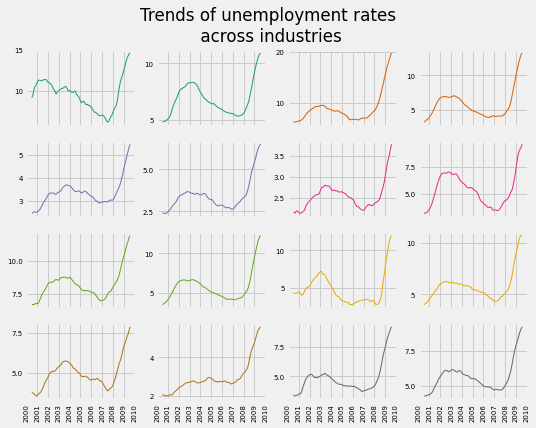

In [ ]:
# Extract the trend values
jobs_trend = {}
for ts in jobs.columns:
  jobs_trend[ts] = jobs_decomp[ts].trend
# put data into DF
trend_df = pd.DataFrame(jobs_trend)
# Plot trends across industries
trend_df.plot(subplots=True, 
              layout=(4, 4), 
              sharey=False, 
              fontsize=7, 
              linewidth=1, 
              legend=False,
              title="Trends of unemployment rates\n across industries", 
              xlabel="", 
              figsize=(8, 6), 
              colormap='Dark2', 
              rot=90)
plt.show()

# Extract and visualize noise

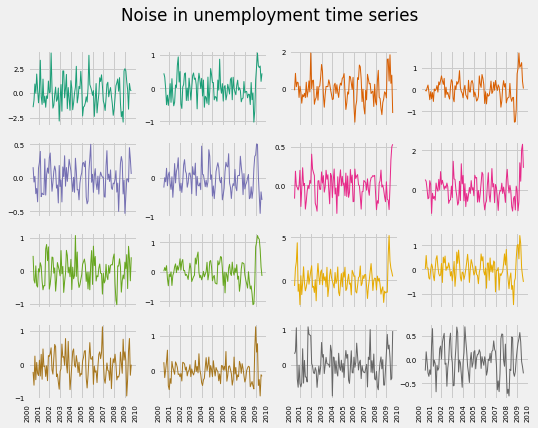

In [ ]:
jobs_noise = {}
for ts in jobs.columns:
  jobs_noise[ts] = jobs_decomp[ts].resid
noise_df = pd.DataFrame(jobs_noise)
noise_df.plot(subplots=True, 
              layout=(4, 4), 
              sharey=False, 
              fontsize=7, 
              linewidth=1, 
              legend=False, 
              xlabel="", 
              title="Noise in unemployment time series", 
              figsize=(8, 6), 
              colormap='Dark2', 
              rot=90)
plt.show()

We can clearly see that unemployment rate in each industry has very different seasonality but very similar trend. The noise diagram indicates outliers and variability of the time series data.

# Correlation between unemployment rates across different industries

Now we will compare seasonatity, trend and noise behaviour across industries by computing correlation between each time series. This allows us to uncover which job industries are the most similar or the most different. 

# Seasonality correlation

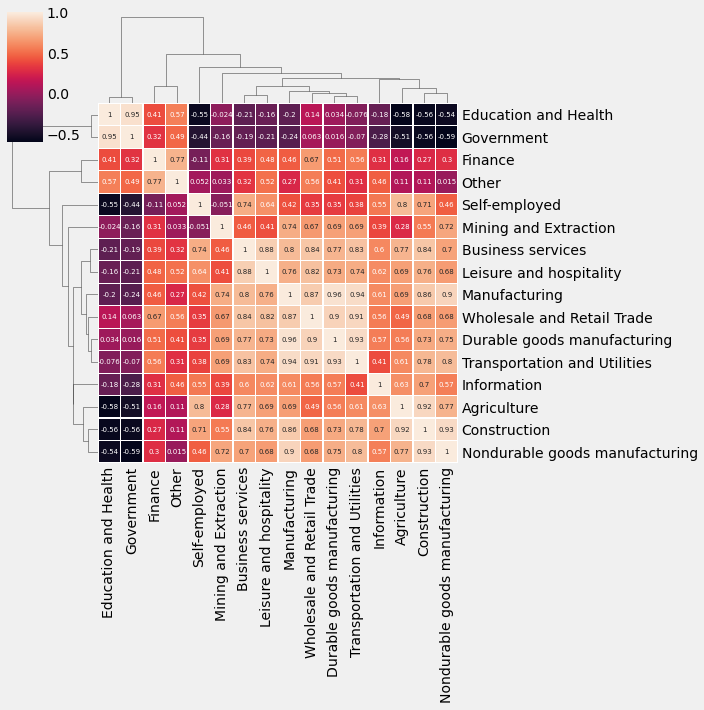

In [ ]:
# compute correlation matrix of the seasonality
seasonality_corr = seasonality_df.corr(method='pearson')
# plot the correlation matrix
fig = sns.clustermap(seasonality_corr, 
               annot=True, 
               annot_kws={'size':7}, 
               linewidth = .4, 
               figsize=(10, 10))
plt.show()

# Trend correlation

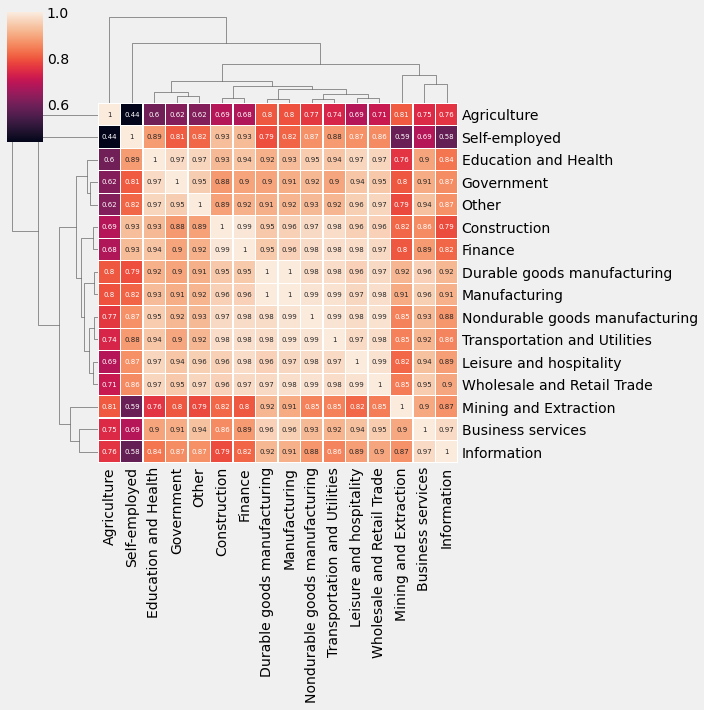

In [ ]:
# compute correlation matrix of trends
trend_corr = trend_df.corr(method='pearson')
# Plot trend correlation matrix
fig = sns.clustermap(trend_corr, 
               annot=True, 
               annot_kws={"size":7}, 
               linewidth = .4, 
               figsize=(10, 10))
plt.show()

# Noise correlation

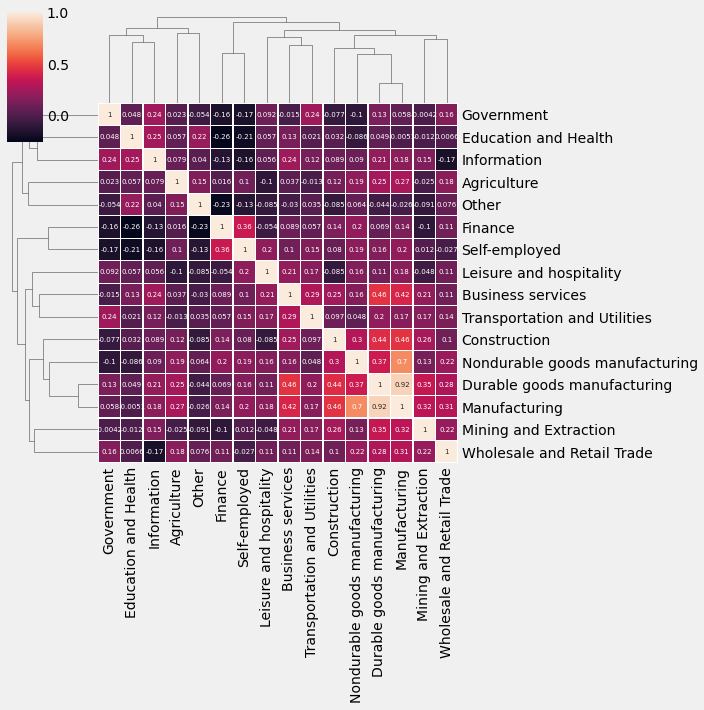

In [ ]:
noise_corr = noise_df.corr(method='pearson')
fig = sns.clustermap(noise_corr, 
                     annot=True, 
                     annot_kws = {"size":7}, 
                     linewidth = .4, 
                     figsize=(10, 10))
plt.show()